predicting car price with machine learning

step 1 : importing required libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

step 2 : loading the dataset  

In [39]:
data_frame = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

step 3 : exploring data

In [40]:
print(data_frame.head())
print(data_frame.info())
print(data_frame.describe())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

step 4 : visualizing data

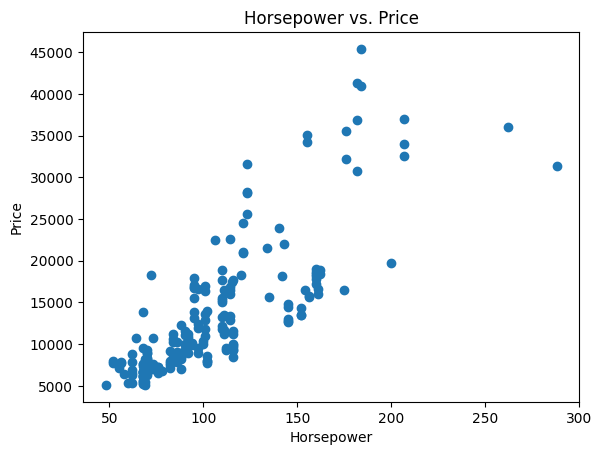

In [41]:
plt.scatter(data_frame['horsepower'], data_frame['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs. Price')
plt.show()

step 5 : preprocessing data

In [42]:
# Droping irrelevant columns
data_frame = data_frame.drop(columns=['car_ID', 'symboling', 'CarName'])

# Converting categorical variables to numeric using one-hot encoding

data_frame = pd.get_dummies(data_frame, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                                 'enginetype', 'cylindernumber', 'fuelsystem'])

# Checking for missing values and handle them if necessary
data_frame.isnull().sum()

# Spliting the dataset into features (X) and the target variable (y)
X = data_frame.drop(columns=['price'])
y = data_frame['price']

# spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)


# Applying feature scaling to numerical features
from sklearn.preprocessing import StandardScaler
numerical_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
                  'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# polynomial features
from sklearn.preprocessing import PolynomialFeatures
# Creating polynomial features (degree=2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Training the model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
# Selecting the top K features using f_regression score
k = 10  # You can adjust K based on the number of top features you want to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Training the model with the selected features
selected_model = LinearRegression()
selected_model.fit(X_train_selected, y_train)

LinearRegression()

step 6 : training the linear regression model

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

# regularization
from sklearn.linear_model import Ridge, Lasso
# Training the model with Ridge regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)

# Training the model with Lasso regression (L1 regularization)
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)

Lasso()

step 7 : making predictions and evaluating the model

In [44]:
y_pred = model.predict(X_test)

# Calculating mean squared error and R-squared to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7932048.817184966
R-squared: 0.7912229785597124


step 8 : visualizing the predictions

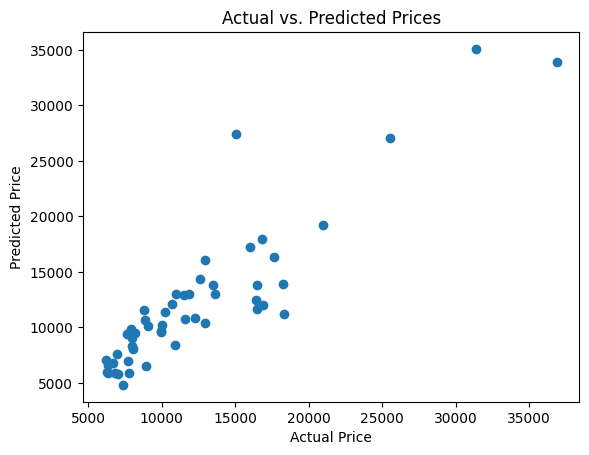

In [45]:
# Ploting actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()